In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_excel("gravity2.xlsx")

columns = []
for col in df.columns:
    columns.append(col)
print(columns)

['iso3_i', 'iso3_j', 'ln_import', 'ln_distance', 'common_language', 'colonial_dependency', 'population_i', 'population_j', 'ln_gdp_i', 'ln_gdp_j', 'gdp_per_capita_i', 'gdp_per_capita_j', 'gatt_i', 'gatt_j', 'wto_i', 'wto_j', 'eu_i', 'eu_j', 'rta', 'entry_cost_i', 'entry_cost_j', 'entry_procedures_i', 'entry_procedures_j', 'entry_time_i', 'entry_time_j', 'entry_tp_i', 'entry_tp_j', 'AD_initations_i', 'AD_initations_j', 'AD_measures_i', 'AD_measures_j']


In [5]:
df1 = df.set_axis(['country_i', 'country_j', 'ln_import', 'ln_distance', 'common_language', 'colonial_dependency', 'population_i', 'population_j', 'ln_gdp_i', 'ln_gdp_j', 'gdp_percapita_i', "gdp_percapita_j", "gatt_i", 'gatt_j', 'wto_i', "wto_j", "eu_i", "eu_j", "rta", "entry_cost_i", "entry_cost_j", "entry_procedures_i", "entry_procedures_j", "entry_time_i", "entry_time_j", "entry_tp_i", "entry_tp_j", "AD_initations_i", "AD_measures_i", "AD_initations_j", "AD_measures_j"], axis=1, inplace=False)

In [14]:
del df1['country_i']

In [15]:
del df1['country_j']

In [16]:
y = df1['ln_import'] # dependent variable
x_columns = ['ln_distance', 'common_language', 'colonial_dependency', 'population_i', 'population_j', 'ln_gdp_i', 'ln_gdp_j', 'gdp_percapita_i', "gdp_percapita_j", "gatt_i", 'gatt_j', 'wto_i', "wto_j", "eu_i", "eu_j", "rta", "entry_cost_i", "entry_cost_j", "entry_procedures_i", "entry_procedures_j", "entry_time_i", "entry_time_j", "entry_tp_i", "entry_tp_j", "AD_initations_i", "AD_measures_i", "AD_initations_j", "AD_measures_j"] # independent variable

In [17]:
df1.shape
df2 = df1.dropna()

features = df2.drop(labels='ln_import',axis=1)
labels = df2[['ln_import']]
labels.shape

(1845, 1)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<ipython-input-19-98d56c0e5289>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, train_labels)


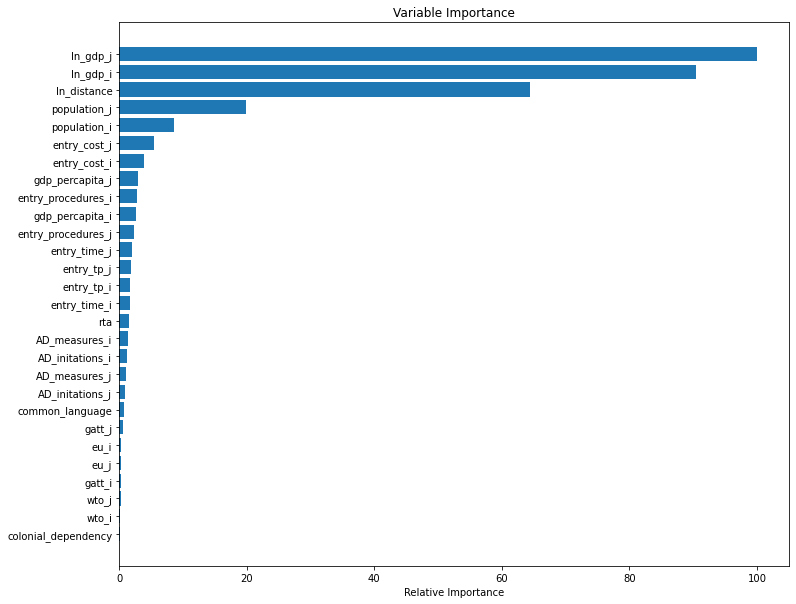

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [6]:
models = []
def get_stats():
    x = df1[x_columns]
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    models.append(results)
    print(results.summary())
    
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     401.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2452.6
No. Observations:                1845   AIC:                             4959.
Df Residuals:                    1818   BIC:                             5108.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -22.6159    

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
#delete entry_tp_j variable, because of her statistical insignificance

x_columns.remove("entry_tp_j")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     401.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2452.6
No. Observations:                1845   AIC:                             4959.
Df Residuals:                    1818   BIC:                             5108.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -22.6159    

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
#delete colonial_dependency variable, because of her statistical insignificance

x_columns.remove("colonial_dependency")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     417.4
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2453.5
No. Observations:                1845   AIC:                             4959.
Df Residuals:                    1819   BIC:                             5102.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.6600      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
#delete AD_initations_i variable, because of her statistical insignificance

x_columns.remove("AD_initations_i")
get_stats()

#R-squared parameter drops down after this operation

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     434.4
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2454.6
No. Observations:                1845   AIC:                             4959.
Df Residuals:                    1820   BIC:                             5097.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.7867      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
#delete population_i variable, because of her statistical insignificance

x_columns.remove("population_i")
get_stats()


C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     452.5
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2456.4
No. Observations:                1845   AIC:                             4961.
Df Residuals:                    1821   BIC:                             5093.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -23.1196      0

In [11]:
#delete AD_initations_j variable, because of her statistical insignificance

x_columns.remove("AD_initations_j")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     472.3
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2458.2
No. Observations:                1845   AIC:                             4962.
Df Residuals:                    1822   BIC:                             5089.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.9144      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
#delete eu_j variable, because of her statistical insignificance

x_columns.remove("eu_j")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     494.2
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2459.6
No. Observations:                1845   AIC:                             4963.
Df Residuals:                    1823   BIC:                             5085.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.5829      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
#delete entry_procedures_j variable, because of her statistical insignificance

x_columns.remove("entry_procedures_j")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     518.3
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:50   Log-Likelihood:                -2460.9
No. Observations:                1845   AIC:                             4964.
Df Residuals:                    1824   BIC:                             5080.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.6104      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
#delete AD_measures_i variable, because of her statistical insignificance

x_columns.remove("AD_measures_i")
get_stats()

                            OLS Regression Results                            
Dep. Variable:              ln_import   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     544.5
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:24:51   Log-Likelihood:                -2462.8
No. Observations:                1845   AIC:                             4966.
Df Residuals:                    1825   BIC:                             5076.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.5179      0

C:\Users\aleks\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
from stargazer.stargazer import Stargazer

In [20]:
stargazer = Stargazer(models)
stargazer

In [ ]:
stargazer.custom_columns(['Model 1', 'Model 2'], [1, 1])
stargazer

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

print(summary_col(models,stars=True,float_format='%0.2f'))


                    ln_import I ln_import II ln_import III ln_import IIII ln_import IIIII ln_import IIIIII ln_import IIIIIII ln_import IIIIIIII ln_import IIIIIIIII
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
AD_initations_i     0.01        0.01         0.01                                                                                                                  
                    (0.00)      (0.00)       (0.00)                                                                                                                
AD_initations_j     -0.01*      -0.01*       -0.01*        -0.01*         -0.01*                                                                                   
                    (0.00)      (0.00)       (0.00)        (0.00)         (0.00)                                                                                   
AD_measures_i  

In [ ]:
import statsmodels.formula.api as smf

with open('summary.txt', 'w') as fh:
    fh.write(stargazer.as_text())

AttributeError: 'Stargazer' object has no attribute 'as_text'

In [ ]:
#wywalam zmienną entry_tp_j, bo jest nieistotna statystycznie (p-value > 0.05)

y2 = df1['ln_import'] # dependent variable
X2 = df1[['ln_distance', 'common_language', 'colonial_dependency', 'population_i', 'population_j', 'ln_gdp_i', 'ln_gdp_j', 'gdp_percapita_i', "gdp_percapita_j", "gatt_i", 'gatt_j', 'wto_i', "wto_j", "eu_i", "eu_j", "rta", "entry_cost_i", "entry_cost_j", "entry_procedures_i", "entry_procedures_j", "entry_time_i", "entry_time_j", "entry_tp_i", "AD_initations_i", "AD_measures_i", "AD_initations_j", "AD_measures_j"]] # independent variable
X2 = sm.add_constant(X2) # adding a constant
lm2 = sm.OLS(y2, X2).fit() # fitting the model
lm2.summary()

In [ ]:
#wywalam zmienną colonial_dependency, bo jest nieistotna statystycznie (p-value > 0.05)

y3 = df1['ln_import'] # dependent variable
X3 = df1[['ln_distance', 'common_language', 'population_i', 'population_j', 'ln_gdp_i', 'ln_gdp_j', 'gdp_percapita_i', "gdp_percapita_j", "gatt_i", 'gatt_j', 'wto_i', "wto_j", "eu_i", "eu_j", "rta", "entry_cost_i", "entry_cost_j", "entry_procedures_i", "entry_procedures_j", "entry_time_i", "entry_time_j", "entry_tp_i", "AD_initations_i", "AD_measures_i", "AD_initations_j", "AD_measures_j"]] # independent variable
X3 = sm.add_constant(X3) # adding a constant
lm3 = sm.OLS(y3, X3).fit() # fitting the model
lm3.summary()

In [ ]:
stargazer.render_latex()